In [2]:
%load_ext autoreload
%autoreload 2

In [24]:
from utils import *
import pickle

In [4]:
data = pickle.load(open('logs/SAC_1.pkl', 'rb'))

In [5]:
callback = LoggingCallback()
callback.infos = data[-10080:]

In [6]:
from environment.single_family_home import SingleFamilyHome
env = SingleFamilyHome()    

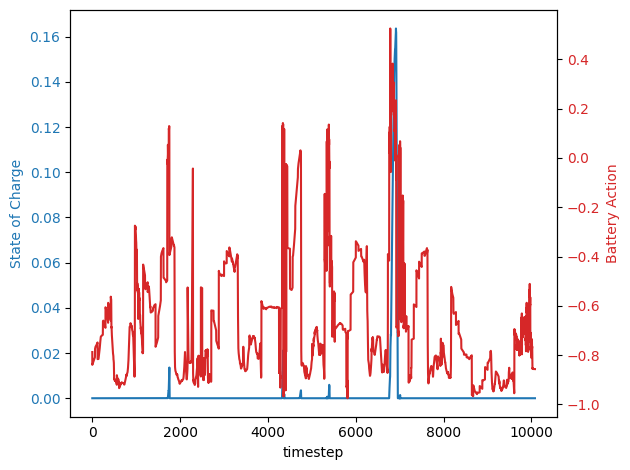

In [7]:
visualize_battery_behaviour(callback, env)

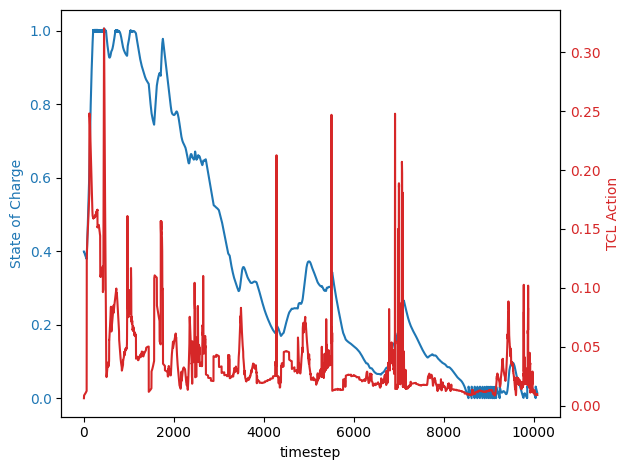

In [9]:
visualize_tcl_behaviour(callback, env)

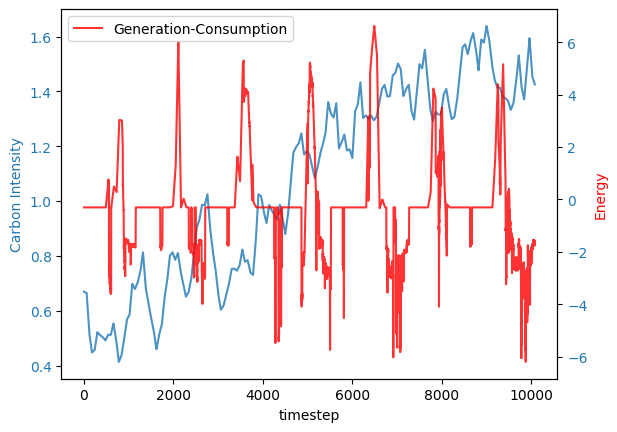

In [19]:
visualize_scenario(callback, env)

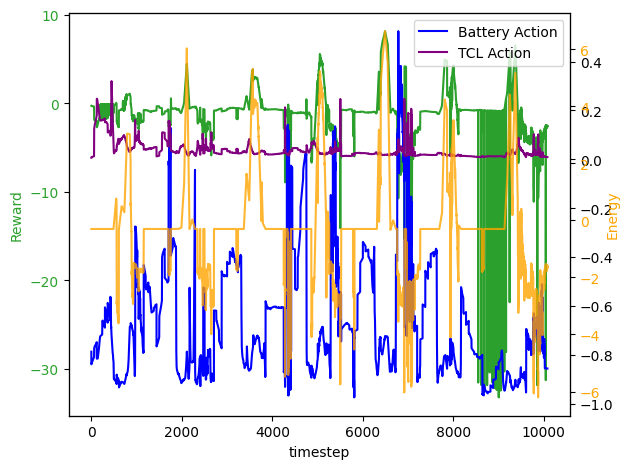

In [25]:
visualize_reward(callback, env)

In [32]:
np.sum([el["reward"] for el in data[-10080:]])

-9726.46267244014